<a href="https://colab.research.google.com/github/Herbertkid/5G_Impact_On_Canada_GDP/blob/main/onGDPimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


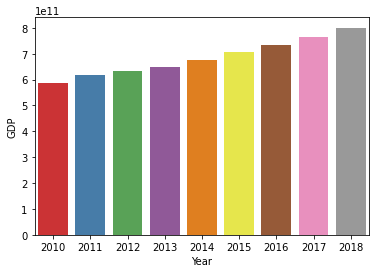

In [ ]:
dfCAGDP = pd.read_csv('/content/ongdp.csv')
dfCAGDP['GDPgrowth'] = (dfCAGDP['GDP'] - dfCAGDP['GDP'].shift(1))
sns.barplot(x='Year', y='GDP', data=dfCAGDP, palette='Set1')

In [ ]:
dfCAGDP = dfCAGDP.dropna()
dfCAGDP

,Year,GDP,GDPgrowth
1,2011,6.161380e+11,2.851000e+10
2,2012,6.349450e+11,1.880700e+10
3,2013,6.494900e+11,1.454500e+10
4,2014,6.768380e+11,2.734800e+10
5,2015,7.068370e+11,2.999900e+10
6,2016,7.337610e+11,2.692400e+10
7,2017,7.644650e+11,3.070400e+10
8,2018,8.003760e+11,3.591100e+10


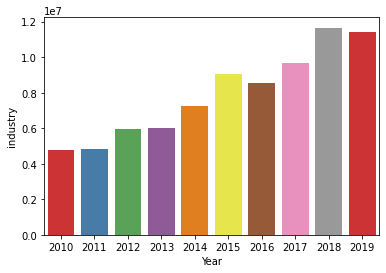

In [ ]:
dfex = pd.read_csv('/content/onexpenditure.csv')
dfex['industry'] = dfex['industry']/1000
sns.barplot(x='Year', y='industry', data=dfex, palette='Set1')

In [ ]:
def calculateEX(xk, industry):
  a = 4.464
  b = 0.000165
  land = 908607.67
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land+industry
def wrapper(row):
  return calculateEX(row['xk'],row['industry'])
def calculateEXxin(xk):
  a = 4.464
  b = 0.000165
  land = 908607.67
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land
def wrapperxin(row):
  return calculateEXxin(row['xk'])

In [ ]:
dfex['expenditure'] = dfex.apply(wrapper, axis=1)
dfex['expenditurexIN'] = dfex.apply(wrapperxin, axis=1)
dfex['exgrowth'] = (dfex['expenditure'] - dfex['expenditure'].shift(1)).dropna()
dfex = dfex.dropna()
dfex

,Year,land,xk,industry,expenditure,expenditurexIN,exgrowth
1,2011,"908,607.67000",14.6,4851400.0,6.419774e+06,1.568374e+06,8.411499e+04
2,2012,"908,607.67000",14.7,5959700.0,7.528089e+06,1.568389e+06,1.108315e+06
3,2013,"908,607.67000",14.9,5986400.0,7.554819e+06,1.568419e+06,2.672998e+04
4,2014,"908,607.67000",15.0,7256100.0,8.824534e+06,1.568434e+06,1.269715e+06
5,2015,"908,607.67000",15.1,9071200.0,1.063965e+07,1.568449e+06,1.815115e+06
6,2016,"908,607.67000",15.3,8532400.0,1.010088e+07,1.568479e+06,-5.387700e+05
7,2017,"908,607.67000",15.5,9678800.0,1.124731e+07,1.568509e+06,1.146430e+06
8,2018,"908,607.67000",15.8,11655900.0,1.322445e+07,1.568554e+06,1.977145e+06
9,2019,"908,607.67000",16.0,11402700.0,1.297128e+07,1.568584e+06,-2.531700e+05


In [ ]:
dfCAGDP['exgrowth'] = dfex['exgrowth']
dfCAGDP['multiplier'] = abs(dfCAGDP['GDPgrowth']/ dfCAGDP['exgrowth']).dropna(axis=0)
dfCAGDP['Year'] = pd.to_datetime(dfCAGDP['Year'],format='%Y')
dfCAGDP.index = dfCAGDP['Year']
dfCAGDP['multiplier']['2011-01-01'] = dfCAGDP['multiplier']['2011-01-01']/10
dfCAGDP['multiplier']['2013-01-01'] = dfCAGDP['multiplier']['2013-01-01']/10
dfCAGDP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,GDP,GDPgrowth,exgrowth,multiplier
Year,,,,,
2011-01-01,2011-01-01,6.161380e+11,2.851000e+10,8.411499e+04,33894.076803
2012-01-01,2012-01-01,6.349450e+11,1.880700e+10,1.108315e+06,16969.002617
2013-01-01,2013-01-01,6.494900e+11,1.454500e+10,2.672998e+04,54414.547989
2014-01-01,2014-01-01,6.768380e+11,2.734800e+10,1.269715e+06,21538.691889
2015-01-01,2015-01-01,7.068370e+11,2.999900e+10,1.815115e+06,16527.327542
2016-01-01,2016-01-01,7.337610e+11,2.692400e+10,-5.387700e+05,49973.085367
2017-01-01,2017-01-01,7.644650e+11,3.070400e+10,1.146430e+06,26782.272295
2018-01-01,2018-01-01,8.003760e+11,3.591100e+10,1.977145e+06,18163.058569


In [ ]:

dfex['Year'] = pd.to_datetime(dfex['Year'],format='%Y') 
dfex.index = dfex['Year']
dfex

,Year,land,xk,industry,expenditure,expenditurexIN,exgrowth
Year,,,,,,,
2011-01-01,2011-01-01,"908,607.67000",14.6,4851400.0,6.419774e+06,1.568374e+06,8.411499e+04
2012-01-01,2012-01-01,"908,607.67000",14.7,5959700.0,7.528089e+06,1.568389e+06,1.108315e+06
2013-01-01,2013-01-01,"908,607.67000",14.9,5986400.0,7.554819e+06,1.568419e+06,2.672998e+04
2014-01-01,2014-01-01,"908,607.67000",15.0,7256100.0,8.824534e+06,1.568434e+06,1.269715e+06
2015-01-01,2015-01-01,"908,607.67000",15.1,9071200.0,1.063965e+07,1.568449e+06,1.815115e+06
2016-01-01,2016-01-01,"908,607.67000",15.3,8532400.0,1.010088e+07,1.568479e+06,-5.387700e+05
2017-01-01,2017-01-01,"908,607.67000",15.5,9678800.0,1.124731e+07,1.568509e+06,1.146430e+06
2018-01-01,2018-01-01,"908,607.67000",15.8,11655900.0,1.322445e+07,1.568554e+06,1.977145e+06
2019-01-01,2019-01-01,"908,607.67000",16.0,11402700.0,1.297128e+07,1.568584e+06,-2.531700e+05


In [ ]:
import statsmodels.api as sm
 

fit1 = sm.tsa.statespace.SARIMAX(dfCAGDP['multiplier'], order=(6,0, 1), seasonal_order=(0, 0, 0, 12)).fit()
y_pred3 = fit1.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitindustry = sm.tsa.statespace.SARIMAX(dfex['industry'], order=(4,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predindustry = fitindustry.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitpo = sm.tsa.statespace.SARIMAX(dfex['xk'], order=(3,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predpo = fitpo.predict(start="2019-01-01", end="2030-01-01", dynamic=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

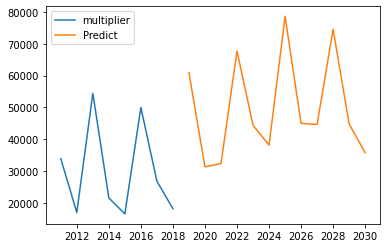

In [ ]:
plt.plot(dfCAGDP['Year'],dfCAGDP['multiplier'], label='multiplier')
plt.plot(y_pred3.index,y_pred3.values, label='Predict')
plt.legend(loc='best')

In [ ]:
y_pred3.values

array([60900.0557592 , 31325.9977468 , 32353.94205245, 67706.96449887,
       44383.62646588, 38129.32539579, 78638.29532966, 44997.73695289,
       44618.03427903, 74535.94999564, 44775.37114073, 35742.22737953])

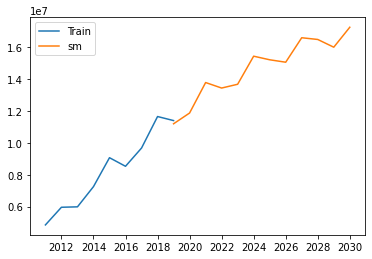

In [ ]:
plt.plot(dfex['Year'],dfex['industry'], label='Train')
plt.plot(y_predindustry.index,y_predindustry.values, label='sm')
plt.legend(loc='best')

In [ ]:
y_predindustry.values

array([11200742.49197035, 11876266.16432399, 13790410.93666847,
       13444449.269807  , 13682125.58881537, 15444506.13071811,
       15218748.71583754, 15066045.45247791, 16602290.47326144,
       16494548.49367141, 16009054.56605046, 17261623.60225164])

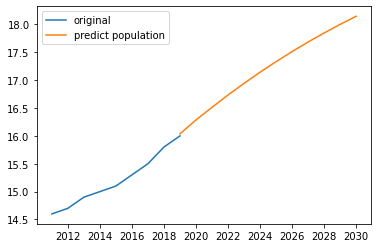

In [ ]:
plt.plot(dfex['Year'],dfex['xk'], label='original')
plt.plot(y_predpo.index,y_predpo.values, label='predict population')
plt.legend(loc='best')

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
dfpred3 = pd.DataFrame({'Year': x3_pred, 'multiplier': y_pred3.values, 'xk':y_predpo.values, 'industry':y_predindustry.values})

dfpred3['Year'] = pd.to_datetime(dfpred3['Year'],format='%Y')  
dfpred3.index = dfpred3['Year']
dfpred3

,Year,multiplier,xk,industry
Year,,,,
2019-01-01,2019-01-01,60900.055759,16.036424,1.120074e+07
2020-01-01,2020-01-01,31325.997747,16.285486,1.187627e+07
2021-01-01,2021-01-01,32353.942052,16.512455,1.379041e+07
2022-01-01,2022-01-01,67706.964499,16.733908,1.344445e+07
2023-01-01,2023-01-01,44383.626466,16.942674,1.368213e+07
2024-01-01,2024-01-01,38129.325396,17.142550,1.544451e+07
2025-01-01,2025-01-01,78638.295330,17.332246,1.521875e+07
2026-01-01,2026-01-01,44997.736953,17.512812,1.506605e+07
2027-01-01,2027-01-01,44618.034279,17.684200,1.660229e+07


In [ ]:
dfpred3['expenditure'] = dfpred3.apply(wrapper, axis=1)
dfpred3['exgrowth'] = (dfpred3['expenditure'] - dfpred3['expenditure'].shift(1)).dropna()

dfpred3['exgrowth'][0] = dfpred3['expenditure'][0] - dfex['expenditure']['2018-01-01']
dfpred3['GDPgrowth'] = abs(dfpred3['exgrowth']*dfpred3['multiplier'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dfpred3.insert(dfpred3.shape[1],'GDP',0)
dfpred3['GDP'][0] = dfpred3['GDPgrowth'][0]+dfCAGDP['GDP']['2018-01-01']
for i in range(1,len(dfpred3)):
  dfpred3['GDP'][i] = dfpred3['GDPgrowth'][i]+dfpred3['GDP'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dfpred3

,Year,multiplier,xk,industry,expenditure,exgrowth,GDPgrowth,GDP
Year,,,,,,,,
2019-01-01,2019-01-01,60900.055759,16.036424,1.120074e+07,1.276933e+07,-4.551221e+05,2.771696e+10,828092959027
2020-01-01,2020-01-01,31325.997747,16.285486,1.187627e+07,1.344489e+07,6.755610e+05,2.116262e+10,849255581756
2021-01-01,2021-01-01,32353.942052,16.512455,1.379041e+07,1.535907e+07,1.914179e+06,6.193123e+10,911186811717
2022-01-01,2022-01-01,67706.964499,16.733908,1.344445e+07,1.501314e+07,-3.459285e+05,2.342177e+10,934608578116
2023-01-01,2023-01-01,44383.626466,16.942674,1.368213e+07,1.525085e+07,2.377076e+05,1.055033e+10,945158904205
2024-01-01,2024-01-01,38129.325396,17.142550,1.544451e+07,1.701326e+07,1.762411e+06,6.719952e+10,1012358427922
2025-01-01,2025-01-01,78638.295330,17.332246,1.521875e+07,1.678753e+07,-2.257290e+05,1.775094e+10,1030109369769
2026-01-01,2026-01-01,44997.736953,17.512812,1.506605e+07,1.663486e+07,-1.526762e+05,6.870083e+09,1036979452937
2027-01-01,2027-01-01,44618.034279,17.684200,1.660229e+07,1.817113e+07,1.536271e+06,6.854538e+10,1105524832378


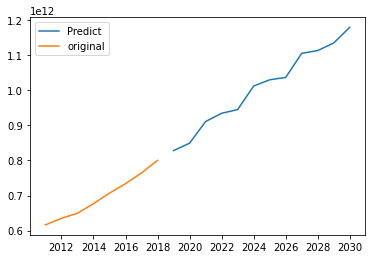

In [ ]:
dfpred3
plt.plot(dfpred3['Year'],dfpred3['GDP'], label='Predict')
plt.plot(dfCAGDP['Year'],dfCAGDP['GDP'], label='original')
plt.legend(loc='best')

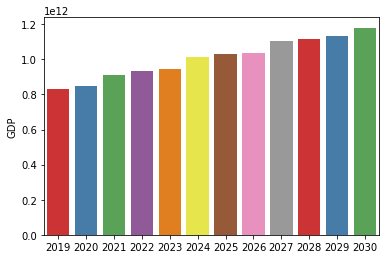

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
sns.barplot(x=x3_pred, y='GDP', data=dfpred3, palette='Set1')